# Import and Config

In [1]:
import tensorflow as tf
from discofuzz.constants import SIMILARITY_METRICS

# Import DisCoFuzz package classes
from discofuzz.constants import *
from discofuzz.config import *
from discofuzz.WiCDatasetHandler import WiCDatasetHandler
from discofuzz.BaseEmbeddingModel import BaseEmbeddingModel
from discofuzz.DisCoFuzz import DisCoFuzz
from discofuzz.EvalHarness import EvalHarness

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU available: {gpus}")

In [3]:
sample_size = 10000
# Define all available similarity metrics from FourierFuzzifier
sim_metrics_enum = [SIMILARITY_METRICS.COS, SIMILARITY_METRICS.W1, SIMILARITY_METRICS.W2, SIMILARITY_METRICS.Q]
n_components = 64
fuzzification_kernel_size = 16
enrich_lemmas_with_wn = True

# load config vars or defaults
X_train, y_train, X_test, y_test = WiCDatasetHandler.load_dataset(".")
X_train, y_train, X_test, y_test = X_train[:sample_size], y_train[:sample_size], X_test[:sample_size], y_test[:sample_size]
sim_metrics = [s.value for s in sim_metrics_enum]
embedding_model = BaseEmbeddingModel()
model = DisCoFuzz(
    embedding_model,
    enrich_lemmas_with_wn=enrich_lemmas_with_wn
)
eval_harness = EvalHarness(
    sim_metrics=sim_metrics_enum,
    composition_strategies=STRATEGIES,
    embedding_model=embedding_model,
    spacy_model=model.spacy_model,
    fuzzifier=model.lemma_vectorizer.fuzzifier,
)

# Run model

In [4]:
sents = X_train["sent_1"].to_list() + X_train["sent_2"].to_list()
embedding_model.fit_transform(sents)

array([[ 0.23790537,  0.05306077,  0.07269607, ...,  0.0751098 ,
         0.00704085, -0.01477477],
       [ 0.08852167, -0.09751743, -0.22334981, ...,  0.03462371,
         0.01768375,  0.04077251],
       [ 0.15320931,  0.2597466 , -0.2082253 , ..., -0.09995275,
        -0.05916547, -0.04577245],
       ...,
       [ 0.16191015,  0.12579906, -0.05918671, ..., -0.07039167,
        -0.10289254, -0.03268277],
       [ 0.27350608,  0.04741481, -0.05511398, ...,  0.12433725,
         0.15227653, -0.11344279],
       [ 0.12429293, -0.10776943,  0.10518764, ..., -0.04523624,
         0.10054126, -0.03883333]], dtype=float32)

In [5]:
X_train = model.fit(X_train)
X_train = model.predict_batch(X_train, STRATEGIES)

Enriching TensorStore instance with wordnet lemma embeddings as defaults...
Embedding all the wordnet lemmas...
Performing dimensionality reduction on all the wordnet lemmas...
Fuzzifying all the dimensionality-reduced wordnet lemmas...
Getting fuzzy tensor embeddings for all the wordnet synsets...
Enriching fuzzified lemma tensors with fuzzified synset tensors...
	Composing embeddings with mean approach...
	Composing embeddings with intersection+mean approach...
	Composing embeddings with intersection+union approach...
	Composing embeddings with intersection+intersection approach...
	Composing embeddings with selective_intersection+mean approach...
	Composing embeddings with selective_intersection+union approach...
	Composing embeddings with selective_intersection+intersection+mean approach...


# Evaluate model

In [6]:
eval_harness.fit(X_train)
sims_df = eval_harness.get_similarities(X_train)
sims_df.head()


	=== Computing similarities with cos metric ===
		Getting compositional embedding relatedness scores for baseline_sent approach...
		Getting compositional embedding relatedness scores for baseline_tok approach...
		Getting compositional embedding relatedness scores for intersection+intersection approach...
		Getting compositional embedding relatedness scores for intersection+mean approach...
		Getting compositional embedding relatedness scores for intersection+union approach...
		Getting compositional embedding relatedness scores for mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+union approach...

	=== Computing similarities with wasserstein-1 metric ===
		Getting compositional embedding relatedness scores for baseline_sent approac

,fuzzy_baseline_sent_cos_sim,fuzzy_baseline_tok_cos_sim,fuzzy_intersection+intersection_cos_sim,fuzzy_intersection+mean_cos_sim,fuzzy_intersection+union_cos_sim,fuzzy_mean_cos_sim,fuzzy_selective_intersection+intersection+mean_cos_sim,fuzzy_selective_intersection+mean_cos_sim,fuzzy_selective_intersection+union_cos_sim,fuzzy_baseline_sent_wasserstein-1_sim,...,fuzzy_baseline_tok_quantum_sim,fuzzy_intersection+intersection_quantum_sim,fuzzy_intersection+mean_quantum_sim,fuzzy_intersection+union_quantum_sim,fuzzy_mean_quantum_sim,fuzzy_selective_intersection+intersection+mean_quantum_sim,fuzzy_selective_intersection+mean_quantum_sim,fuzzy_selective_intersection+union_quantum_sim,baseline_sent_cos_sim,baseline_tok_cos_sim
0,0.039287,0.017408,0.058948,-0.003895,0.058948,0.025304,0.041309,0.041309,0.002302,-0.082360,...,-0.093562,-0.000305,-0.000064,-0.000305,-0.010651,-0.000335,-0.000335,0.000127,-0.143688,-0.124497
1,0.021395,0.003198,0.057168,-0.059489,0.057168,0.021187,0.047647,0.047647,0.049224,-0.098928,...,0.025699,0.000736,-0.002590,0.000736,0.006311,0.000017,0.000017,-0.000352,-0.146585,0.040091
2,0.042134,-0.107916,-0.106265,-0.017907,-0.106265,0.129976,-0.063672,-0.063672,-0.037383,-0.037798,...,-0.257284,0.001942,0.004099,0.001942,-0.010146,0.000072,0.000072,-0.003408,-0.101913,-0.285893
3,0.028646,-0.013452,0.035976,0.027262,0.035976,0.011345,0.053470,0.053470,0.036428,-0.063729,...,-0.055402,0.001693,0.002586,0.001693,-0.001597,-0.000309,-0.000309,-0.000604,-0.135199,-0.025038
4,0.041799,-0.038762,-0.005869,0.026909,-0.005869,0.009643,0.044292,0.044292,0.010777,0.217419,...,-0.043705,-0.000256,-0.003853,-0.000256,0.006933,-0.000303,-0.000303,-0.000645,0.376279,0.134164


In [7]:
sim_eval_df = eval_harness.classify_similarities(sims_df)

# Visualizations

## Custom similarities vs cosine similarity in original space

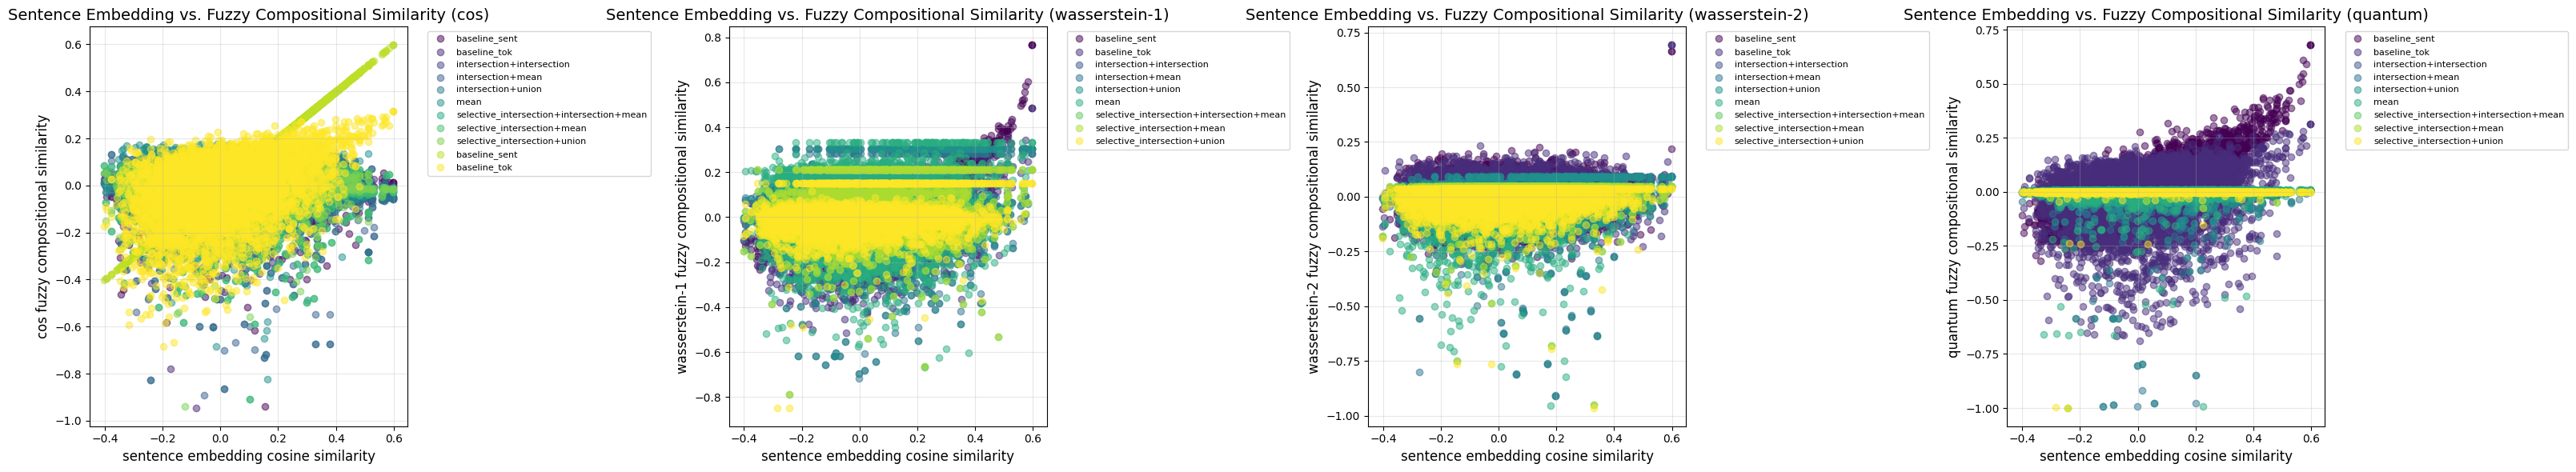

In [8]:
eval_harness.visualize_similarities(sims_df)

## Confusion Matrices

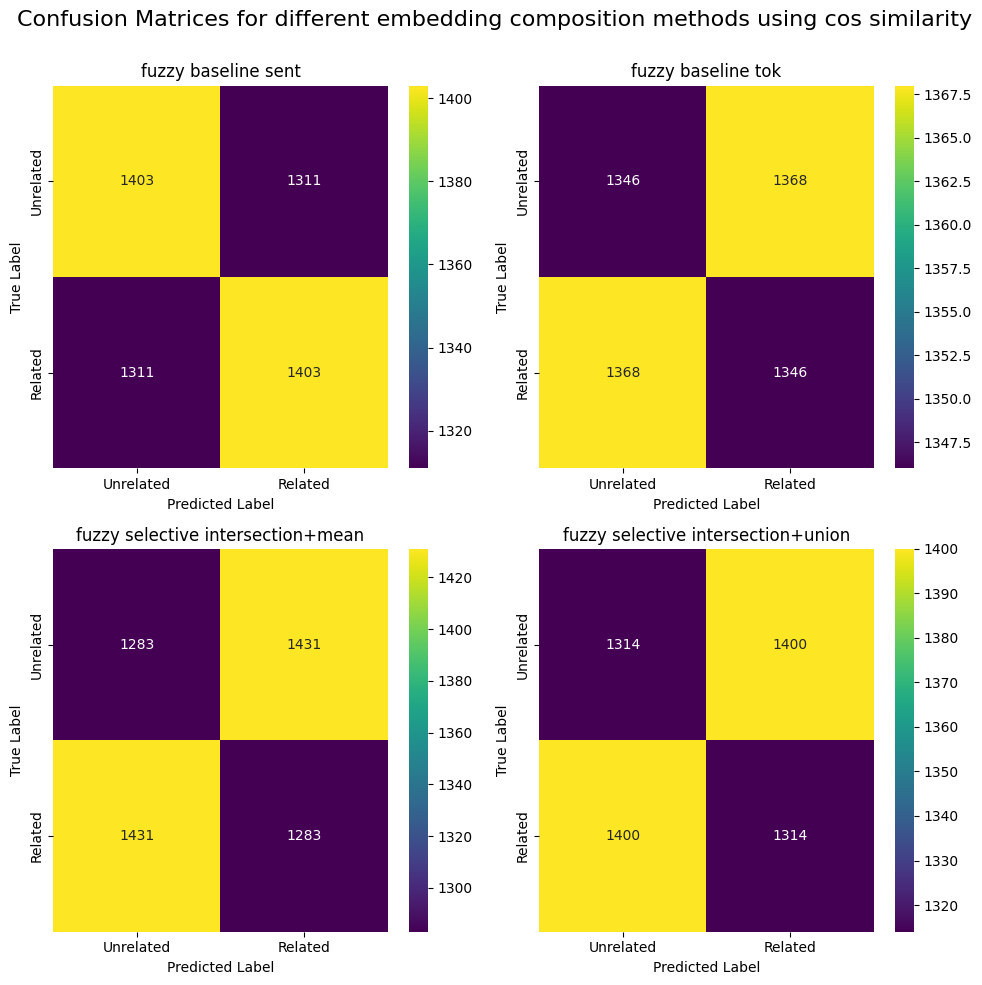

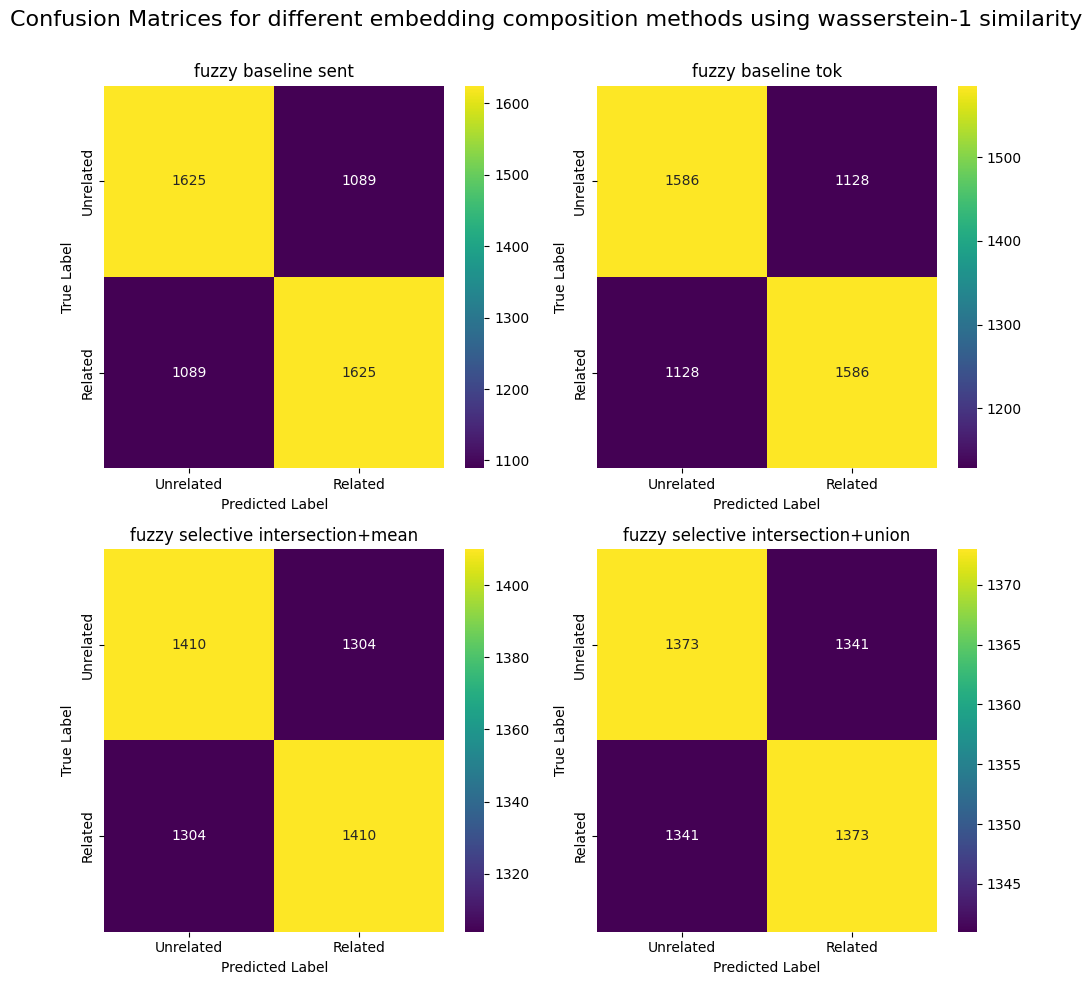

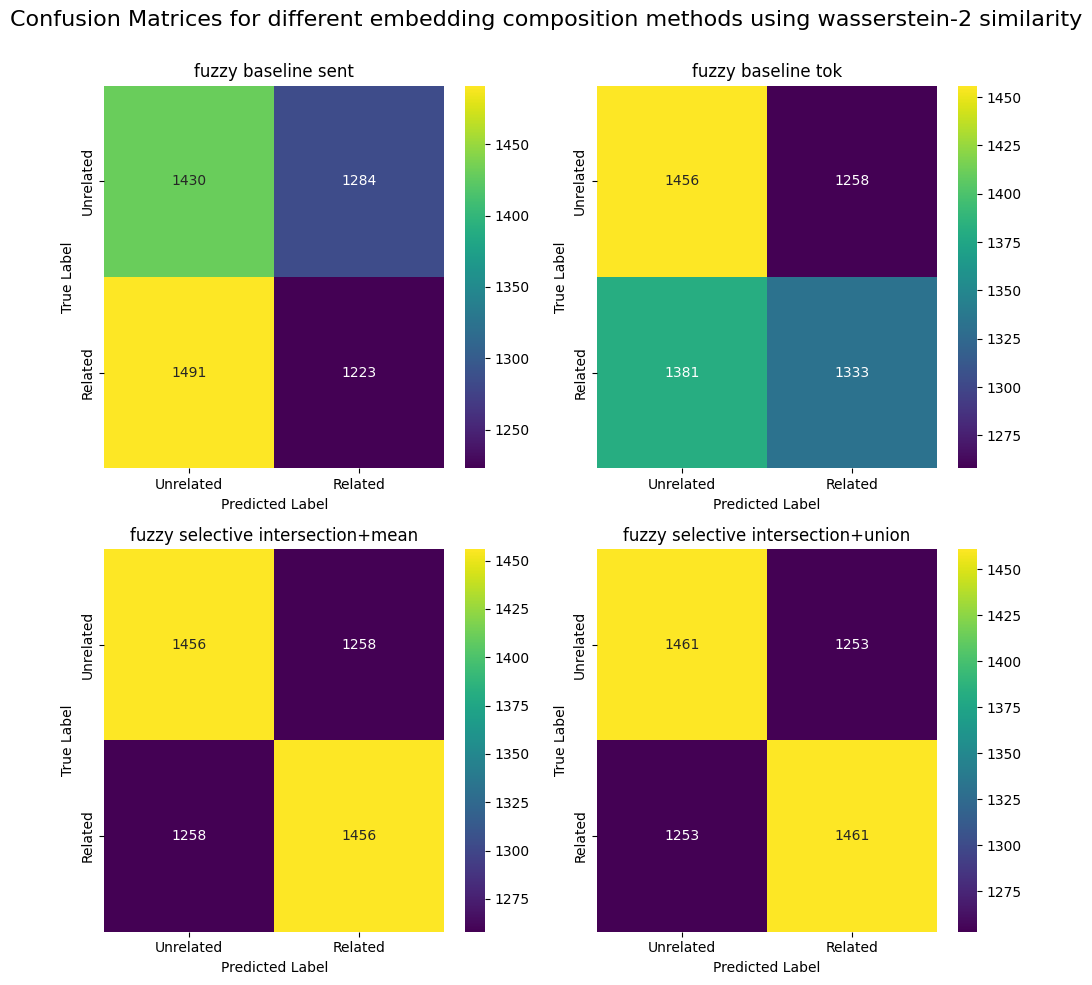

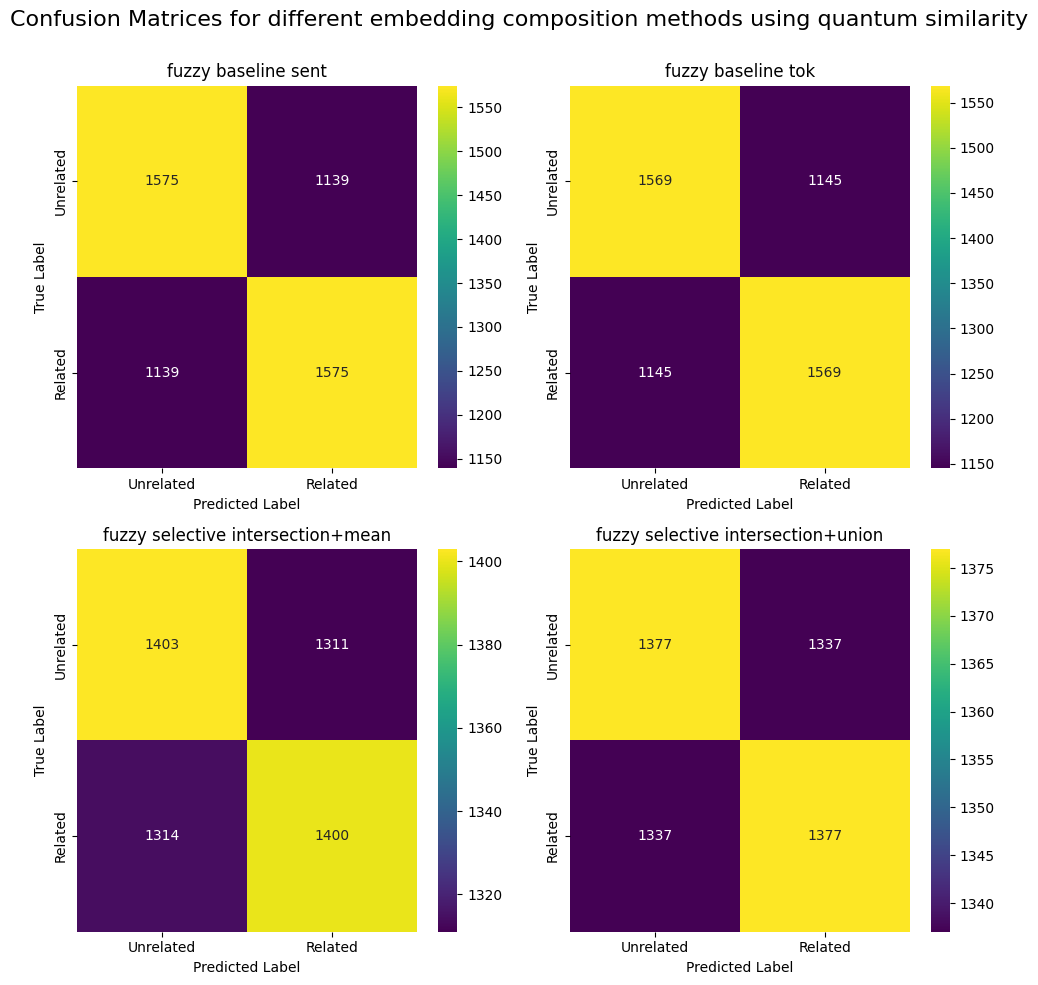

In [9]:
models = [
    "baseline_sent",
    "baseline_tok",
    "selective_intersection+mean",
    "selective_intersection+union",
]
metric_cols = []
for sim_metric in sim_metrics:
    metric_cols.extend([
        f"fuzzy_{model}_{sim_metric}_sim_pred"
        for model in models
    ])
eval_harness.plot_confusion_matrices(
    X=sim_eval_df[metric_cols],
    y=y_train
)

# Evaluation Results

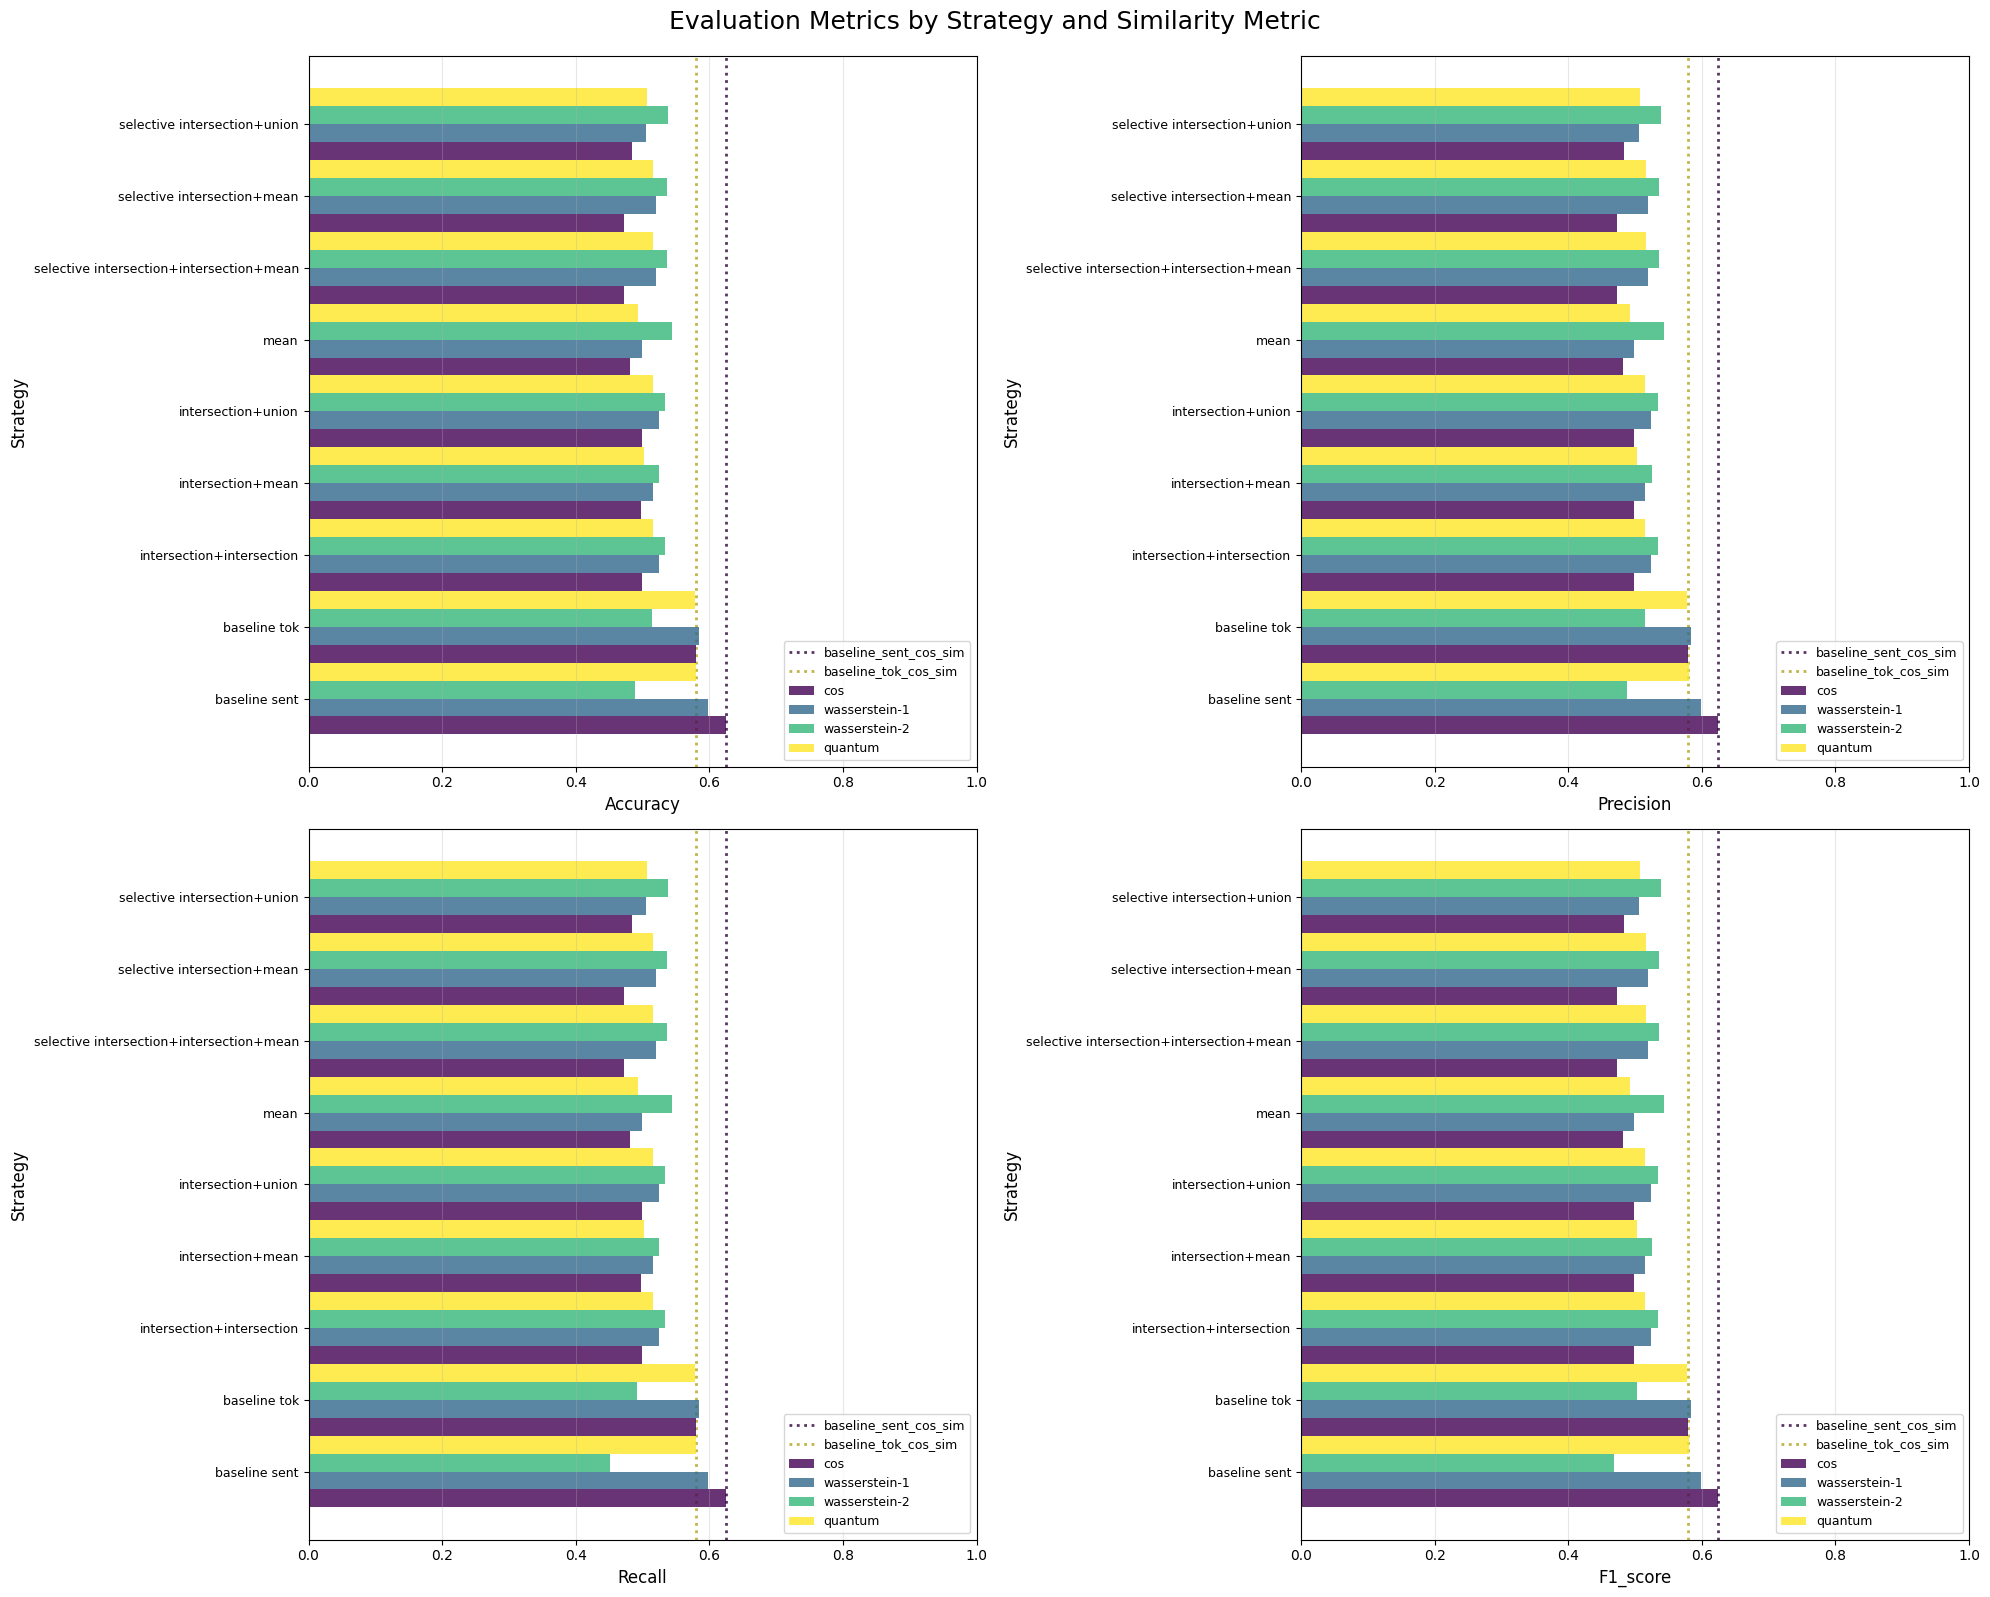

,strategy,similarity_metric,model,accuracy,precision,recall,f1_score
0,baseline_sent,cos,baseline_sent_cos_sim,0.624539,0.624539,0.624539,0.624539
1,baseline_sent,wasserstein-1,fuzzy_baseline_sent_wasserstein-1_sim,0.598747,0.598747,0.598747,0.598747
2,baseline_tok,wasserstein-1,fuzzy_baseline_tok_wasserstein-1_sim,0.584377,0.584377,0.584377,0.584377
3,baseline_sent,quantum,fuzzy_baseline_sent_quantum_sim,0.580324,0.580324,0.580324,0.580324
4,baseline_tok,cos,baseline_tok_cos_sim,0.579956,0.579956,0.579956,0.579956
5,baseline_tok,quantum,fuzzy_baseline_tok_quantum_sim,0.578113,0.578113,0.578113,0.578113
6,mean,wasserstein-2,fuzzy_mean_wasserstein-2_sim,0.543478,0.543478,0.543478,0.543478
7,selective_intersection+union,wasserstein-2,fuzzy_selective_intersection+union_wasserstein...,0.538320,0.538320,0.538320,0.538320
8,selective_intersection+intersection+mean,wasserstein-2,fuzzy_selective_intersection+intersection+mean...,0.536478,0.536478,0.536478,0.536478
9,selective_intersection+mean,wasserstein-2,fuzzy_selective_intersection+mean_wasserstein-...,0.536478,0.536478,0.536478,0.536478


In [10]:
metrics_df = eval_harness.score(sim_eval_df, y_train)
metrics_df[:10]

In [11]:
metrics_df.to_csv(f"full_train_eval-wn_enriched={enrich_lemmas_with_wn}-n_components={n_components}-kernel_size={fuzzification_kernel_size}.tsv", sep="\t")